## Customer Churn Prediction

`"churn" refers to the rate at which customers stop doing business with a company over a specific period`

**Dataset**
[Kaggle Dataset Source](https://www.kaggle.com/datasets/blastchar/telco-customer-churn
)

In [67]:
# import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv("datasets/customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [69]:
df.drop('customerID', axis="columns", inplace=True)

In [70]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [71]:
df['MonthlyCharges'].values[:10]

array([ 29.85,  56.95,  53.85,  42.3 ,  70.7 ,  99.65,  89.1 ,  29.75,
       104.8 ,  56.15])

In [72]:
df['TotalCharges'].values[:10]

array(['29.85', '1889.5', '108.15', '1840.75', '151.65', '820.5',
       '1949.4', '301.9', '3046.05', '3487.95'], dtype=object)

Total Charges is somehow string, so we need to convert it into numbers.

In [73]:
pd.to_numeric(df['TotalCharges'], errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [74]:
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()].shape

(11, 20)

In [75]:
df1 = df[df['TotalCharges'] != ' '].copy()
df1.shape

(7032, 20)

In [76]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])

In [77]:
df1['TotalCharges'].dtype

dtype('float64')

In [78]:
tenure_churn_no = df1[df1['Churn'] == 'No']['tenure']
tenure_churn_yes = df1[df1['Churn'] == 'Yes']['tenure']

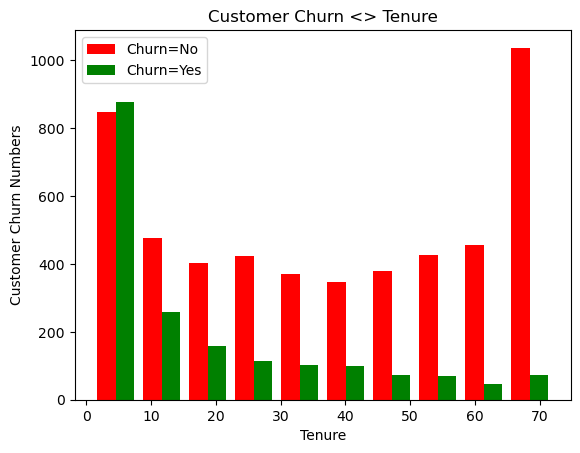

In [79]:
plt.hist([tenure_churn_no, tenure_churn_yes], color=["red", "green"], label=['Churn=No', 'Churn=Yes'])
plt.title('Customer Churn <> Tenure')
plt.xlabel('Tenure')
plt.ylabel('Customer Churn Numbers')
plt.legend()
plt.show()

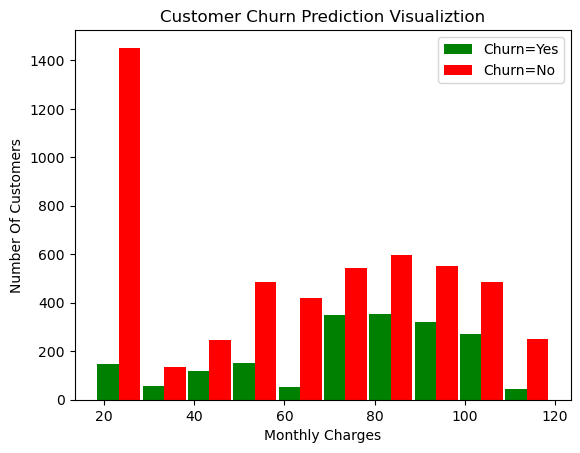

In [80]:
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

# blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
# blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=[
         'green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()
plt.show()

In [81]:
def print_unique_col_values(df):
    for column in df:
        # if df[column].dtypes == 'object':
            print(f'{column}: {df[column].unique()}')

print_unique_col_values(df1)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:

In [82]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No',inplace=True)

In [83]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: ['No' 'Yes']


In [84]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes': 1, 'No': 0},inplace=True)

/var/folders/20/0ywsyqdn0jg7qr3g1qycbmqh0000gn/T/ipykernel_20265/1119954898.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes': 1, 'No': 0},inplace=True)
/var/folders/20/0ywsyqdn0jg7qr3g1qycbmqh0000gn/T/ipykernel_20265/1119954898.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tr

In [85]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [86]:
df1['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

/var/folders/20/0ywsyqdn0jg7qr3g1qycbmqh0000gn/T/ipykernel_20265/3771459934.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)
/var/folders/20/0ywsyqdn0jg7qr3g1qycbmqh0000gn/T/ipykernel_20265/3771459934.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downc

In [87]:
df1.gender.unique()

array([1, 0])

### One hot encoding for >2 categorical variables

This way of using `pd.get_dummies()` is only good for one time training on this dataset. Better use `sklearn onehotencoder`

In [88]:
df2 = pd.get_dummies(data=df1, columns=[
                     'InternetService', 'Contract', 'PaymentMethod'], dtype=int)
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [89]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5984,0,0,1,0,14,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4772,1,0,1,1,69,1,0,0,1,1,...,1,0,0,0,1,0,1,0,0,0
820,1,0,1,0,61,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4885,0,1,1,0,72,1,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0
1119,0,0,1,1,70,0,0,1,0,1,...,1,0,0,0,0,1,1,0,0,0


In [90]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

### Feature scaling for standard values

In [92]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [93]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1585,0,0,1,0,0.577465,1,1,1,0,0,...,1,0,0,0,1,0,0,1,0,0
3128,0,0,0,1,0.056338,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
125,0,0,0,0,0.450704,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2757,1,0,1,1,0.957746,1,1,1,0,1,...,0,1,0,0,1,0,1,0,0,0
338,1,0,0,0,0.492958,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0


In [ ]:
df2['tenure'].describe() # scaled from 0-1

count    7032.000000
mean        0.442560
std         0.345708
min         0.000000
25%         0.112676
50%         0.394366
75%         0.760563
max         1.000000
Name: tenure, dtype: float64

#### Model Training

In [95]:
X = df2.drop("Churn", axis="columns") #creates a copy and assigns to X
y = df2['Churn'].copy()


In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
X_train.shape, X_test.shape

((5625, 26), (1407, 26))

#### Artificial Neural Network Training

In [98]:
import tensorflow as tf
from tensorflow import keras

In [106]:
model = keras.Sequential([
    keras.layers.Dense(units=30, activation="relu", name="hidden_layer_1"),
    keras.layers.Dense(units=15, activation="relu", name="hidden_layer_2"),
    keras.layers.Dense(units=10, activation="relu", name="hidden_layer_3"),
    keras.layers.Dense(units=1, activation="sigmoid", name="output_layer")
    
])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [107]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
   metrics=['accuracy'] 
)

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step - accuracy: 0.5983 - loss: 0.6199
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.7770 - loss: 0.4429
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.7992 - loss: 0.4180
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.7934 - loss: 0.4324
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.8051 - loss: 0.4111
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.7941 - loss: 0.4244
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.8054 - loss: 0.4060
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.8182 - loss: 0.4041
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.8017 - loss: 0.4168
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - accuracy: 0.8096 - loss: 0.4114
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.8169 - loss: 0.3929
Epoch 12/100
176/17

In [108]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7625 - loss: 0.5347


[0.5684576630592346, 0.7690120935440063]

In [109]:
y_predicted = model.predict(X_test)

y_predicted[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[0.00181366],
       [0.05685481],
       [0.8163896 ],
       [0.01409858],
       [0.10515039]], dtype=float32)

In [110]:
type(y_predicted[0])

numpy.ndarray

In [112]:
threshold = 0.5
y_predicted_verdict = []
for  value in y_predicted:
    if value > threshold:
        y_predicted_verdict.append(1)
    else:
        y_predicted_verdict.append(0)
        
y_predicted_verdict[:10]

[0, 0, 1, 0, 0, 1, 0, 1, 0, 0]

In [114]:
y_test[:10].values

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [115]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_predicted_verdict))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1033
           1       0.57      0.56      0.56       374

    accuracy                           0.77      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.77      0.77      0.77      1407



Text(45.722222222222214, 0.5, 'Truth')

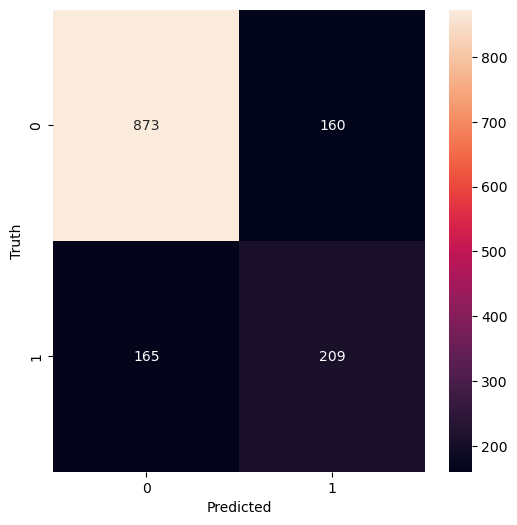

In [117]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_verdict)

plt.figure(figsize=(6, 6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')